##### PAIR PROGRAMMIG - REGRESIÓN LOGÍSTICA - AJUSTE

In [15]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

- Realizar el ajuste o ajustes de los modelos


In [4]:
df = pd.read_pickle("../datos/df_estan_cod.pkl")
df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,...,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,0,1,1.041667,0,2,-1.400844,0,0,2,...,2,3,3,4,0,3,1,4,4,0.000000
1,0,1,1,0.291667,0,1,0.454852,0,0,4,...,3,3,3,2,1,2,3,4,4,25.833333
2,0,0,1,-1.041667,0,2,0.179747,0,0,4,...,0,3,3,4,2,2,2,2,4,0.000000
3,0,0,1,0.833333,0,2,-1.098734,0,0,4,...,2,3,3,3,0,0,2,3,2,0.000000
4,0,0,1,1.250000,0,2,-1.325738,0,0,4,...,3,2,3,3,0,0,2,3,1,0.000000


In [11]:
df.reset_index(drop=True)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,...,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,0,1,1.041667,0,2,-1.400844,0,0,2,...,2,3,3,4,0,3,1,4,4,0.000000
1,0,1,1,0.291667,0,1,0.454852,0,0,4,...,3,3,3,2,1,2,3,4,4,25.833333
2,0,0,1,-1.041667,0,2,0.179747,0,0,4,...,0,3,3,4,2,2,2,2,4,0.000000
3,0,0,1,0.833333,0,2,-1.098734,0,0,4,...,2,3,3,3,0,0,2,3,2,0.000000
4,0,0,1,1.250000,0,2,-1.325738,0,0,4,...,3,2,3,3,0,0,2,3,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,0,0,-0.458333,0,2,-0.163713,0,1,4,...,1,3,3,4,2,2,2,2,4,0.000000
129876,1,1,0,0.958333,0,1,0.136709,3,2,3,...,3,3,3,3,2,3,3,3,4,14.500000
129877,1,1,0,1.208333,0,2,0.333333,3,0,4,...,3,3,2,2,2,2,3,4,4,12.916667
129878,1,1,0,1.083333,0,2,0.443038,3,2,2,...,3,3,3,4,2,3,3,3,4,16.083333


In [12]:
df.index

RangeIndex(start=0, stop=129880, step=1)

In [6]:
# separamos los datos en X e y

X1 = df.drop("satisfaction", axis = 1)
y1 = df["satisfaction"]

In [7]:
X1.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,0,1,1.041667,0,2,-1.400844,0,0,2,2,2,3,3,4,0,3,1,4,4,0.000000
1,1,1,0.291667,0,1,0.454852,0,0,4,0,3,3,3,2,1,2,3,4,4,25.833333
2,0,1,-1.041667,0,2,0.179747,0,0,4,2,0,3,3,4,2,2,2,2,4,0.000000
3,0,1,0.833333,0,2,-1.098734,0,0,4,2,2,3,3,3,0,0,2,3,2,0.000000
4,0,1,1.250000,0,2,-1.325738,0,0,4,1,3,2,3,3,0,0,2,3,1,0.000000


In [13]:
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: satisfaction, dtype: int64

## AJUSTE Y PREDICCIÓN

In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [16]:
# definimos la regresión logistica
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [18]:
train_df_esta = pd.DataFrame({'Real': y_train1, 'Predicho': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})

test_df_esta  = pd.DataFrame({'Real': y_test1,  'Predicho': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})

resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)

resultados.head()

,Real,Predicho,Set
21413,0,0,Train
7284,1,1,Train
86080,1,1,Train
59842,1,1,Train
69486,1,1,Train


### INTRO A LA MATRIZ DE CONFUSIÓN

- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

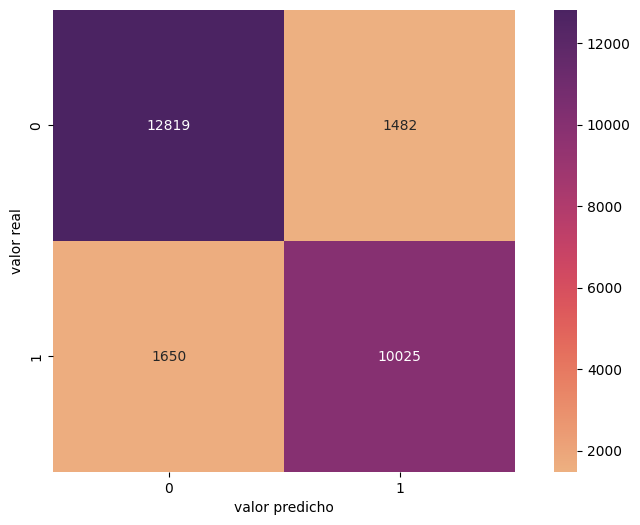

In [22]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (10, 6))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "flare")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Recordemos la codificación de nuestra VR:
- satisfecho/a : 0
- insatisfecho/a: 1

- VN: 12819 - satisfechos reales y predichos
- VP: 10025 - insatisfechos reales y predichos
- FN: 1650 - satisfechos predichos pero no reales
- FP: 1482 - insatisfechos predichos que en realidad sí que estaban satisfechos 

Por tanto, vamos a priorizar la precisión, ya que queremos reducir los FN: VP/VP+FP